# Dependencies

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Data Preprocesing for Logistic Regression

In [5]:
# Read the scaled images into Jupyter Notebook and create DataFrame
file_path = r'ENTER_YOUR_CSV_FILE_PATH_HERE'
df = pd.read_csv(file_path)

In [6]:
# Confirm all images are listed in df
len(df)

32022

In [7]:
# Define the list of healthy labels
healthy_labels = ['Tomato_healthy']

# Create the 'healthy?' column based on healthy labels
df['healthy?'] = df['label'].isin(healthy_labels).astype(int)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,2344,2345,2346,2347,2348,2349,2350,2351,label,healthy?
0,0.613821,0.582329,0.584677,0.608871,0.575397,0.577689,0.610442,0.577075,0.579365,0.604839,...,0.423529,0.438735,0.448819,0.425197,0.434783,0.454902,0.431373,0.440945,Tomato_Bacterial_spot,0
1,0.491870,0.445783,0.443548,0.483871,0.436508,0.434263,0.489960,0.442688,0.440476,0.500000,...,0.639216,0.648221,0.657480,0.649606,0.656126,0.654902,0.647059,0.653543,Tomato_Bacterial_spot,0
2,0.479675,0.457831,0.447581,0.479839,0.456349,0.446215,0.469880,0.446640,0.436508,0.471774,...,0.643137,0.644269,0.641732,0.645669,0.652174,0.615686,0.619608,0.629921,Tomato_Bacterial_spot,0
3,0.650407,0.634538,0.641129,0.649194,0.630952,0.637450,0.634538,0.616601,0.623016,0.625000,...,0.498039,0.498024,0.500000,0.484252,0.486166,0.494118,0.478431,0.476378,Tomato_Bacterial_spot,0
4,0.682927,0.650602,0.653226,0.673387,0.638889,0.645418,0.670683,0.636364,0.646825,0.669355,...,0.400000,0.403162,0.444882,0.393701,0.395257,0.458824,0.411765,0.413386,Tomato_Bacterial_spot,0


In [8]:
# Confirm binary value is correct
df.loc[df['label'] == 'Tomato_healthy'].head(5)

,0,1,2,3,4,5,6,7,8,9,...,2344,2345,2346,2347,2348,2349,2350,2351,label,healthy?
3127,0.463415,0.449799,0.475806,0.447581,0.436508,0.462151,0.449799,0.438735,0.464286,0.471774,...,0.329412,0.367589,0.330709,0.334646,0.375494,0.317647,0.317647,0.358268,Tomato_healthy,1
3128,0.573171,0.542169,0.560484,0.572581,0.539683,0.557769,0.590361,0.557312,0.575397,0.588710,...,0.258824,0.276680,0.259843,0.263780,0.280632,0.254902,0.258824,0.275591,Tomato_healthy,1
3129,0.516260,0.477912,0.532258,0.508065,0.468254,0.533865,0.497992,0.462451,0.523810,0.495968,...,0.603922,0.667984,0.645669,0.622047,0.671937,0.631373,0.607843,0.657480,Tomato_healthy,1
3130,0.467480,0.433735,0.500000,0.463710,0.424603,0.494024,0.453815,0.411067,0.480159,0.447581,...,0.639216,0.699605,0.649606,0.641732,0.699605,0.658824,0.650980,0.708661,Tomato_healthy,1
3131,0.642276,0.606426,0.641129,0.633065,0.595238,0.629482,0.598394,0.561265,0.595238,0.592742,...,0.419608,0.478261,0.476378,0.429134,0.486166,0.494118,0.447059,0.507874,Tomato_healthy,1


In [9]:
# Save new CSV file with binary healthy / not healthy column
file_path = r'ENTER_YOUR_CSV_FILE_PATH_HERE'
df.to_csv(file_path, index=False)

# Fit Model and Make Predictions

In [39]:
# Read the scaled images into Jupyter Notebook and create DataFrame
file_path = r'ENTER YOUR FILE PATH HERE'
df = pd.read_csv(file_path)

In [40]:
# Remove label for logistic regression model
df = df.drop('label', axis=1)

In [41]:
# Separate features and labels
X = df.drop('healthy?', axis=1).values
y = df['healthy?'].values 

In [42]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [43]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Create model
model = LogisticRegression(random_state=1,  max_iter=2000)
model

LogisticRegression(max_iter=2000, random_state=1)

In [44]:
# Fit the model using training data
logreg = model.fit(X_train, y_train)

In [45]:
# Make a prediction using test data
predictions = logreg.predict(X_test)

In [46]:
# Generate a confusion matrix for the model
matrix = confusion_matrix(y_test, predictions)
matrix = pd.DataFrame(matrix,
                     index = ['Actual Unhealthy', 'Actual Healthy'],
                     columns = ['Predicted Unhealthy', 'Predicted Healthy'])
matrix

,Predicted Unhealthy,Predicted Healthy
Actual Unhealthy,7110,119
Actual Healthy,277,500


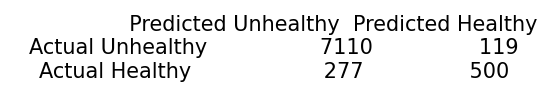

In [47]:
#Export confusion matrix to chart visual
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(3, 1))
ax.axis('off')
ax.text(0.5, 0.5, matrix, fontsize=15, ha='center', va='center')
plt.savefig('..\Output\confusion_matrix_text.png',  dpi=300, bbox_inches='tight')
plt.show()

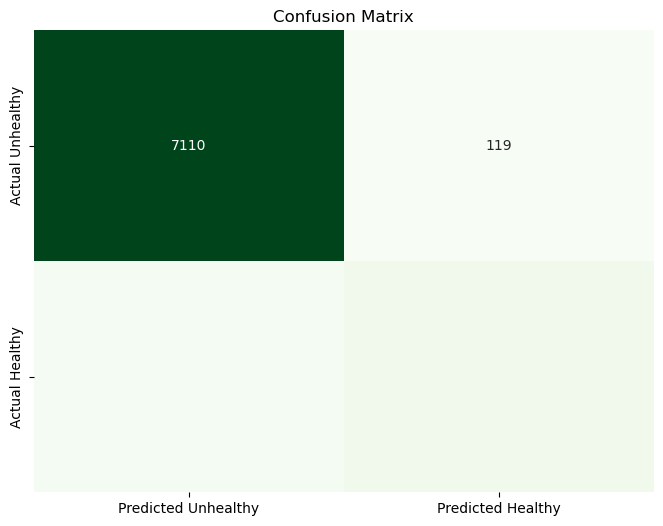

In [48]:
# Visualize confusion matrix
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix')
plt.savefig('..\Output\confusion_matrix.png',  dpi=300, bbox_inches='tight')
plt.show()

In [49]:
# Print the classification report for the model
target_names  = ["Unhealthy (0)", "Healthy (1)"]
report = classification_report(y_test, predictions, target_names  = target_names)

# Print the training classification report
print(report)

               precision    recall  f1-score   support

Unhealthy (0)       0.96      0.98      0.97      7229
  Healthy (1)       0.81      0.64      0.72       777

     accuracy                           0.95      8006
    macro avg       0.89      0.81      0.84      8006
 weighted avg       0.95      0.95      0.95      8006



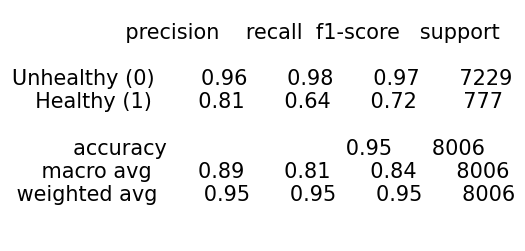

In [50]:
# Visualize classification report
fig, ax = plt.subplots(figsize=(6, 3))
ax.axis('off')
ax.text(0.5, 0.5, report, fontsize=15, ha='center', va='center')
plt.savefig('..\Output\classification_report.png',  dpi=300, bbox_inches='tight')
plt.show()